In [166]:
!pip install plotly --upgrade

In [167]:
!pip install --upgrade geopandas mapclassify folium
!pip install census contextily adjustText 

In [168]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import folium
from folium import plugins
from matplotlib import pyplot as plt
import matplotlib.patheffects as pe
import mapclassify
from census import Census
import contextily as ctx 
from adjustText import adjust_text

plt.rcParams["figure.figsize"] = (10,10) # set this once for a default plot size

In [169]:
#Read my dataset
file_path = 'nuclear_power_plants.csv'
df = gpd.read_file(file_path)

In [170]:
df

,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId,geometry
0,1,Ågesta,59.206000,18.082900,Sweden,SE,Shutdown,PHWR,,1957-12-01,1964-05-01,1974-06-02,9,2015-05-24T04:51:37+03:00,WNA/IAEA,528,None
1,2,Akademik Lomonosov-1,69.709579,170.306250,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,,30,2021-05-31,WNA/IAEA/Google Maps,895,None
2,3,Akademik Lomonosov-2,69.709579,170.306250,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,,30,2021-05-31,WNA/IAEA/Google Maps,896,None
3,4,Akhvaz-1,,,Iran,IR,Planned,,,,,,,,WNA,,None
4,5,Akhvaz-2,,,Iran,IR,Planned,,,,,,,,WNA,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,815,BREST-OD-300,56.637414,84.904510,Russia,RU,Under Construction,FBR,BREST-OD-300,2021-06-08,,,300,2022-01-05T00:04:08+02:00,IAEA/WNA,1106,None
799,816,Sanaocun-2,27.201487,120.517974,China,CN,Under Construction,PWR,HRP1000,2021-12-30,,,1117,2022-04-21T20:26:19+03:00,IAEA,1107,None
800,817,El Dabaa-2,31.044167,28.497778,Egypt,EG,Under Construction,PWR,VVER-1200,2022-11-19,,,1100,2023-08-28T08:01:45+03:00,IAEA/Wikipedia,138,None
801,818,El Dabaa-3,31.044167,28.497778,Egypt,EG,Under Construction,PWR,VVER-1200,2023-05-03,,,1100,2023-08-28T08:24:00+03:00,IAEA/Wikipedia,1120,None


In [171]:
df = df[df['Country'] == 'United States']
df

,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId,geometry
16,17,Arkansas Nuclear One-1 (ANO-1),35.310000,-93.230000,United States,US,Operational,PWR,B&W LLP (DRYAMB),1968-10-01,1974-12-19,,850,2017-02-10T23:58:30+02:00,WNA/IAEA,652,None
17,18,Arkansas Nuclear One-2 (ANO-2),35.310000,-93.229000,United States,US,Operational,PWR,CE 2LP (DRYAMB),1968-12-06,1980-03-26,,912,2017-02-10T23:58:53+02:00,WNA/IAEA,689,None
37,38,Beaver Valley-1,40.624000,-80.432000,United States,US,Operational,PWR,WH 3LP (DRYSUB),1970-06-26,1976-10-01,,835,2017-02-10T23:58:44+02:00,WNA/IAEA,669,None
38,39,Beaver Valley-2,40.624000,-80.432000,United States,US,Operational,PWR,WH 3LP (DRYSUB),1974-05-03,1987-11-17,,836,2017-02-10T23:58:59+02:00,WNA/IAEA,712,None
56,57,Big Rock Point,45.359000,-85.195000,United States,US,Shutdown,BWR,,1960-05-01,1963-03-29,1997-08-29,72,2015-05-24T04:51:41+03:00,WNA/IAEA,601,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,737,Watts Bar-2,35.601000,-84.789000,United States,US,Operational,PWR,WH 4LP (ICECND),1973-09-01,2016-10-19,,1165,2017-02-10T23:58:57+02:00,WNA/IAEA,700,None
730,740,Wolf Creek,38.239000,-95.691000,United States,US,Operational,PWR,WH 4LP (DRYAMB),1977-05-31,1985-09-03,,1170,2017-02-10T23:59:19+02:00,WNA/IAEA,751,None
754,764,Yankee Rowe,42.728000,-72.929000,United States,US,Shutdown,PWR,PWR,1957-11-01,1961-07-01,1991-10-01,175,2015-05-24T04:51:43+03:00,WNA/IAEA,638,None
762,778,Zion-1,42.446000,-87.801000,United States,US,Shutdown,PWR,WH 4LP,1968-12-01,1973-12-31,1998-02-13,1040,2017-02-10T23:58:20+02:00,WNA/IAEA,640,None


In [172]:
df['Capacity'] = df['Capacity'].replace('', '0').astype(int)

In [173]:
df['Latitude'] = df['Latitude'].replace('', '0.0').astype(float)

In [174]:
df['Longitude'] = df['Longitude'].replace('', '0.0').astype(float)

In [175]:
df = df.loc[(df['Latitude'] != 0.0) & (df['Longitude'] != 0.0)]

In [176]:
df['Status'] = df['Status'].astype(str)

In [177]:
df['Country'] = df['Country'].astype(str)

In [178]:
df['Name'] = df['Name'].astype(str)

In [179]:
df.shape

(137, 17)

In [180]:
center = [37.0902, -95.7129]

# creating map
map = folium.Map(location = center, zoom_start = 4.2)
for i, j in df.iterrows():
    location = [j['Latitude'], j['Longitude']]
    folium.Marker(location, popup = f'Name: {j["Name"]}').add_to(map)
map.save('Distribution_map.html')



In [181]:
center = [40.0583, -74.4057]

# creating map
map = folium.Map(location = center, zoom_start = 8)
for i, j in df.iterrows():
    location = [j['Latitude'], j['Longitude']]
    folium.Marker(location, popup = f'Name: {j["Name"]}').add_to(map)
map

<Axes: >

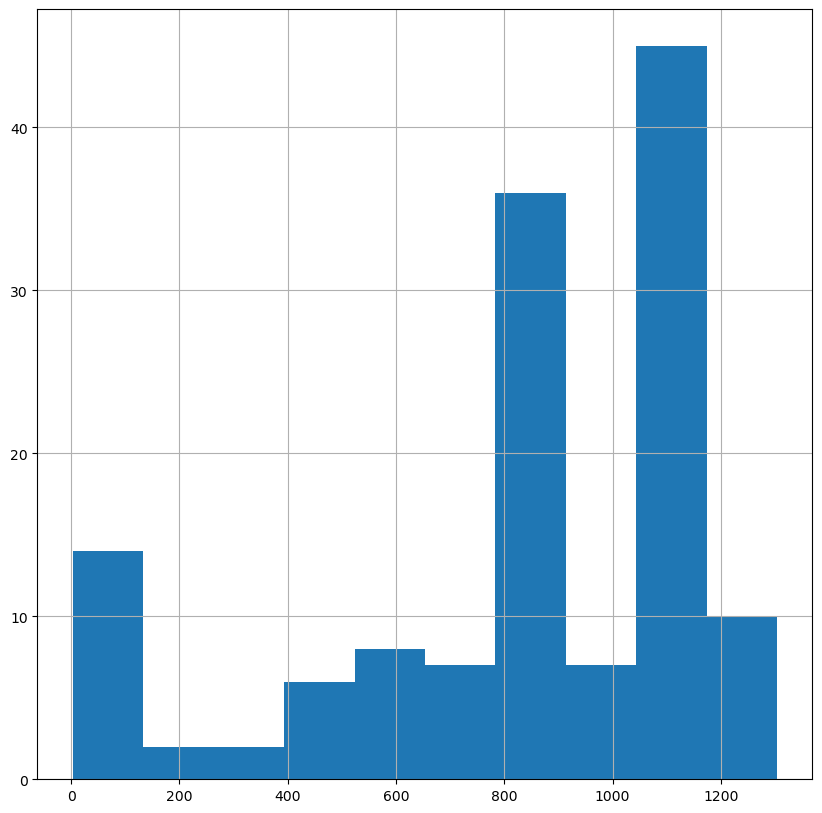

In [189]:
df['Capacity'].hist()

In [188]:
df['Capacity'].mean()
df['Capacity'].min()
df['Capacity'].max()

1304

In [190]:
import folium

# Assuming 'Status', 'Capacity', and 'ReactorType' are columns in your DataFrame df
# Add a 'layer' column to distinguish between operational and non-operational
df['layer'] = df['Status'].apply(lambda x: 'Operational' if x == 'Operational' else 'Non-Operational')

# Define the center coordinates for the United States
center_us = [37.0902, -95.7129]

# Create a base map with the new center coordinates
map = folium.Map(location=center_us, zoom_start=4)

# Create layers for operational, non-operational, low capacity, high capacity, and reactor type labels
operational_layer = folium.FeatureGroup(name='Operational')
non_operational_layer = folium.FeatureGroup(name='Non-Operational')
low_capacity_layer = folium.FeatureGroup(name='Low Capacity')
high_capacity_layer = folium.FeatureGroup(name='High Capacity')
reactor_type_label_layer = folium.FeatureGroup(name='Reactor Type (Labels)')

# Add markers to the respective layers
for i, j in df.iterrows():
    location = [j['Latitude'], j['Longitude']]
    popup_text = f'Name: {j["Name"]}, Status: {j["Status"]}, Capacity: {j["Capacity"]}, Reactor Type: {j["ReactorType"]}'

    if j['Status'] == 'Operational':
        folium.Marker(location, popup=popup_text, icon=folium.Icon(color='green')).add_to(operational_layer)
    else:
        folium.Marker(location, popup=popup_text, icon=folium.Icon(color='red')).add_to(non_operational_layer)

    # Define colors for low and high capacity
    if j['Capacity'] < 800:
        folium.CircleMarker(location, radius=8, color='red', fill=True, fill_color='lightred', fill_opacity=0.7).add_to(low_capacity_layer)
    else:
        folium.CircleMarker(location, radius=8, color='Darkgreen', fill=True, fill_color='lightgreen', fill_opacity=0.7).add_to(high_capacity_layer)

    # Add reactor type labels
    label = folium.Marker(location, icon=folium.DivIcon(html=f'<div style="font-size: 10pt; color: black">{j["ReactorType"]}</div>'))
    label.add_to(reactor_type_label_layer)

# Add layers to the map
operational_layer.add_to(map)
non_operational_layer.add_to(map)
low_capacity_layer.add_to(map)
high_capacity_layer.add_to(map)
reactor_type_label_layer.add_to(map)

# Add layer control to toggle between layers
folium.LayerControl().add_to(map)

# Display the map
map.save('map_with_layers.html')

In [191]:
c = Census("")
#Picking the state of NJ
nj_census = c.acs5.state_county_tract(fields = ('NAME', 'B01001_001E', 'B01001_001M', 'B19055_001E', 'B19055_001M', 'GEO_ID'),
                                      state_fips = '34', #I chose New York
                                      county_fips = "*", # an asterisk means all options; use it here to get all the counties within New York
                                      tract = "*", # get all the tracts within these counties
                                      year = 2019)

In [192]:
# dataframe from the census data
nj_census_df = pd.DataFrame(nj_census)

# Show the dataframe first few 5 
nj_census_df.head()

,NAME,B01001_001E,B01001_001M,B19055_001E,B19055_001M,GEO_ID,state,county,tract
0,"Census Tract 5012.10, Gloucester County, New J...",3452.0,249.0,1159.0,57.0,1400000US34015501210,34,015,501210
1,"Census Tract 5013.01, Gloucester County, New J...",3570.0,155.0,1384.0,69.0,1400000US34015501301,34,015,501301
2,"Census Tract 5013.03, Gloucester County, New J...",2594.0,197.0,977.0,72.0,1400000US34015501303,34,015,501303
3,"Census Tract 5019, Gloucester County, New Jersey",4135.0,21.0,1320.0,141.0,1400000US34015501900,34,015,501900
4,"Census Tract 5003, Gloucester County, New Jersey",2959.0,25.0,1087.0,65.0,1400000US34015500300,34,015,500300


In [193]:
def remove_after_county(value):
    parts = value.split('County', 1)  # Split at the first occurrence of 'County'
    return 'County'.join(parts[:-1])  # Join all parts before the 'County'

# Apply the function to the 'Location' column
nj_census_df['NAME'] = nj_census_df['NAME'].apply(remove_after_county)

In [194]:
nj_census_df

,NAME,B01001_001E,B01001_001M,B19055_001E,B19055_001M,GEO_ID,state,county,tract
0,"Census Tract 5012.10, Gloucester",3452.0,249.0,1159.0,57.0,1400000US34015501210,34,015,501210
1,"Census Tract 5013.01, Gloucester",3570.0,155.0,1384.0,69.0,1400000US34015501301,34,015,501301
2,"Census Tract 5013.03, Gloucester",2594.0,197.0,977.0,72.0,1400000US34015501303,34,015,501303
3,"Census Tract 5019, Gloucester",4135.0,21.0,1320.0,141.0,1400000US34015501900,34,015,501900
4,"Census Tract 5003, Gloucester",2959.0,25.0,1087.0,65.0,1400000US34015500300,34,015,500300
...,...,...,...,...,...,...,...,...,...
2005,"Census Tract 235.02, Bergen",5222.0,588.0,2225.0,140.0,1400000US34003023502,34,003,023502
2006,"Census Tract 236.01, Bergen",2868.0,355.0,1278.0,92.0,1400000US34003023601,34,003,023601
2007,"Census Tract 236.02, Bergen",4885.0,474.0,1420.0,111.0,1400000US34003023602,34,003,023602
2008,"Census Tract 321.03, Bergen",5154.0,372.0,2488.0,86.0,1400000US34003032103,34,003,032103


In [195]:
def remove_before_comma(value):
    parts = value.split(',', 1)  # Split at the first occurrence of ','
    return parts[-1].strip()  # Take the part after ',' and remove leading/trailing spaces

# Apply the function to the 'Location' column
nj_census_df['NAME'] = nj_census_df['NAME'].apply(remove_before_comma)


In [196]:
nj_census_df

,NAME,B01001_001E,B01001_001M,B19055_001E,B19055_001M,GEO_ID,state,county,tract
0,Gloucester,3452.0,249.0,1159.0,57.0,1400000US34015501210,34,015,501210
1,Gloucester,3570.0,155.0,1384.0,69.0,1400000US34015501301,34,015,501301
2,Gloucester,2594.0,197.0,977.0,72.0,1400000US34015501303,34,015,501303
3,Gloucester,4135.0,21.0,1320.0,141.0,1400000US34015501900,34,015,501900
4,Gloucester,2959.0,25.0,1087.0,65.0,1400000US34015500300,34,015,500300
...,...,...,...,...,...,...,...,...,...
2005,Bergen,5222.0,588.0,2225.0,140.0,1400000US34003023502,34,003,023502
2006,Bergen,2868.0,355.0,1278.0,92.0,1400000US34003023601,34,003,023601
2007,Bergen,4885.0,474.0,1420.0,111.0,1400000US34003023602,34,003,023602
2008,Bergen,5154.0,372.0,2488.0,86.0,1400000US34003032103,34,003,032103


In [197]:
nj_census_df["GEOID"] = nj_census_df["state"] + nj_census_df["county"] + nj_census_df["tract"]

# delete the state and tract columns from the dataframe
nj_census_df = nj_census_df.drop(columns = ["state", "tract", "county"])

In [198]:
nj_census_df 

,NAME,B01001_001E,B01001_001M,B19055_001E,B19055_001M,GEO_ID,GEOID
0,Gloucester,3452.0,249.0,1159.0,57.0,1400000US34015501210,34015501210
1,Gloucester,3570.0,155.0,1384.0,69.0,1400000US34015501301,34015501301
2,Gloucester,2594.0,197.0,977.0,72.0,1400000US34015501303,34015501303
3,Gloucester,4135.0,21.0,1320.0,141.0,1400000US34015501900,34015501900
4,Gloucester,2959.0,25.0,1087.0,65.0,1400000US34015500300,34015500300
...,...,...,...,...,...,...,...
2005,Bergen,5222.0,588.0,2225.0,140.0,1400000US34003023502,34003023502
2006,Bergen,2868.0,355.0,1278.0,92.0,1400000US34003023601,34003023601
2007,Bergen,4885.0,474.0,1420.0,111.0,1400000US34003023602,34003023602
2008,Bergen,5154.0,372.0,2488.0,86.0,1400000US34003032103,34003032103


In [199]:
url_wv = 'https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_34_tract.zip'
map_data = gpd.read_file(url_wv)

In [200]:
map_data

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,34,031,256804,34031256804,2568.04,Census Tract 2568.04,G5020,S,29792621,809082,+41.0787934,-074.3779531,"POLYGON ((-74.41591 41.08861, -74.41484 41.089..."
1,34,031,246300,34031246300,2463,Census Tract 2463,G5020,S,10100083,480508,+40.9104210,-074.2642143,"POLYGON ((-74.28932 40.92851, -74.28932 40.928..."
2,34,031,181200,34031181200,1812,Census Tract 1812,G5020,S,401624,0,+40.9242986,-074.1499553,"POLYGON ((-74.15537 40.92394, -74.15535 40.924..."
3,34,031,256803,34031256803,2568.03,Census Tract 2568.03,G5020,S,14231776,740595,+41.1221009,-074.3805752,"POLYGON ((-74.41296 41.11469, -74.41051 41.117..."
4,34,031,246003,34031246003,2460.03,Census Tract 2460.03,G5020,S,6580967,1795588,+40.9770103,-074.2610348,"POLYGON ((-74.28242 40.97003, -74.28241 40.970..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,34,029,715402,34029715402,7154.02,Census Tract 7154.02,G5020,S,1046204,163588,+40.0963919,-074.2255717,"POLYGON ((-74.24488 40.10377, -74.24447 40.104..."
2006,34,005,700401,34005700401,7004.01,Census Tract 7004.01,G5020,S,1732988,0,+39.9643984,-075.0015556,"POLYGON ((-75.01234 39.97025, -75.01103 39.970..."
2007,34,005,700504,34005700504,7005.04,Census Tract 7005.04,G5020,S,3555745,7066,+39.9664460,-074.9282889,"POLYGON ((-74.95318 39.96457, -74.95117 39.964..."
2008,34,035,053704,34035053704,537.04,Census Tract 537.04,G5020,S,5013207,16315,+40.4910633,-074.6764601,"POLYGON ((-74.68692 40.50360, -74.68532 40.504..."


In [201]:
#Merge the dataset with NJ county boundries shapefile
merged = map_data.merge(nj_census_df, left_on = "GEOID", right_on = "GEOID")

# Show result
merged.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,B01001_001E,B01001_001M,B19055_001E,B19055_001M,GEO_ID
0,34,031,256804,34031256804,2568.04,Census Tract 2568.04,G5020,S,29792621,809082,+41.0787934,-074.3779531,"POLYGON ((-74.41591 41.08861, -74.41484 41.089...",Passaic,6766.0,338.0,2320.0,143.0,1400000US34031256804
1,34,031,246300,34031246300,2463,Census Tract 2463,G5020,S,10100083,480508,+40.9104210,-074.2642143,"POLYGON ((-74.28932 40.92851, -74.28932 40.928...",Passaic,4824.0,350.0,1738.0,99.0,1400000US34031246300
2,34,031,181200,34031181200,1812,Census Tract 1812,G5020,S,401624,0,+40.9242986,-074.1499553,"POLYGON ((-74.15537 40.92394, -74.15535 40.924...",Passaic,4886.0,567.0,1386.0,102.0,1400000US34031181200
3,34,031,256803,34031256803,2568.03,Census Tract 2568.03,G5020,S,14231776,740595,+41.1221009,-074.3805752,"POLYGON ((-74.41296 41.11469, -74.41051 41.117...",Passaic,5234.0,389.0,2125.0,141.0,1400000US34031256803
4,34,031,246003,34031246003,2460.03,Census Tract 2460.03,G5020,S,6580967,1795588,+40.9770103,-074.2610348,"POLYGON ((-74.28242 40.97003, -74.28241 40.970...",Passaic,5790.0,291.0,1828.0,70.0,1400000US34031246003


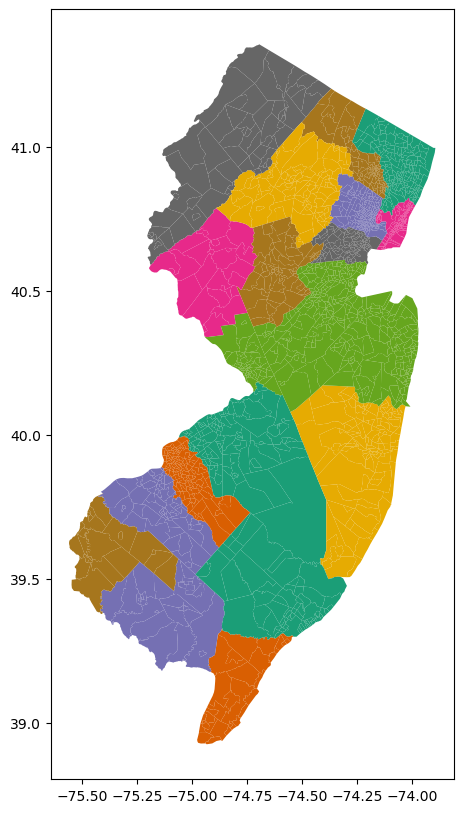

In [202]:
merged = merged.loc[merged["ALAND"] > 0]
merged.plot("COUNTYFP", cmap = 'Dark2')
plt.show()

In [203]:
# Calculate CV for population who worked full time
merged["B19055_001SE"] = merged["B19055_001M"] / 1.645  # Calculate standard error at 90% Confidence Interval (z score = 1.645)
merged["B19055_001CV"] = (merged["B19055_001SE"] / merged["B19055_001E"]) * 100  # Calculate coefficient of variation

# Dropping standard errors since CV is more relevant for mapping
merged = merged.drop(columns=["B19055_001SE"])

In [204]:
merged.loc[merged["B19055_001CV"] < 0, "B19055_001CV"] = 100 # get rid of negative CVs and set them to a high number

In [205]:
merged["B19055_001CV"].replace([np.inf], 0, inplace=True)

In [206]:
#Selecting Calculated CVs for household income equal or below 4%
less_than_40 = merged[merged['B19055_001CV'] <= 4]
less_than_40 = less_than_40[less_than_40['B19055_001CV'] > 0]
less_than_40

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME_y,B01001_001E,B01001_001M,B19055_001E,B19055_001M,GEO_ID,B19055_001CV
0,34,031,256804,34031256804,2568.04,Census Tract 2568.04,G5020,S,29792621,809082,+41.0787934,-074.3779531,"POLYGON ((-74.41591 41.08861, -74.41484 41.089...",Passaic,6766.0,338.0,2320.0,143.0,1400000US34031256804,3.746987
1,34,031,246300,34031246300,2463,Census Tract 2463,G5020,S,10100083,480508,+40.9104210,-074.2642143,"POLYGON ((-74.28932 40.92851, -74.28932 40.928...",Passaic,4824.0,350.0,1738.0,99.0,1400000US34031246300,3.462737
4,34,031,246003,34031246003,2460.03,Census Tract 2460.03,G5020,S,6580967,1795588,+40.9770103,-074.2610348,"POLYGON ((-74.28242 40.97003, -74.28241 40.970...",Passaic,5790.0,291.0,1828.0,70.0,1400000US34031246003,2.327855
8,34,031,256805,34031256805,2568.05,Census Tract 2568.05,G5020,S,87589154,6310961,+41.0968573,-074.4256687,"POLYGON ((-74.50321 41.08587, -74.50315 41.085...",Passaic,5277.0,299.0,1783.0,100.0,1400000US34031256805,3.409438
9,34,031,124200,34031124200,1242,Census Tract 1242,G5020,S,3389831,0,+40.8845522,-074.1732590,"POLYGON ((-74.19072 40.87257, -74.19043 40.873...",Passaic,7738.0,572.0,2492.0,148.0,1400000US34031124200,3.610337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,34,035,053105,34035053105,531.05,Census Tract 531.05,G5020,S,5299207,192973,+40.5137026,-074.5081889,"POLYGON ((-74.52620 40.51012, -74.52614 40.510...",Somerset,7362.0,511.0,3068.0,172.0,1400000US34035053105,3.408060
2004,34,029,714100,34029714100,7141,Census Tract 7141,G5020,S,3415067,363162,+40.0250227,-074.1423844,"POLYGON ((-74.16036 40.02933, -74.16031 40.029...",Ocean,3364.0,252.0,1660.0,75.0,1400000US34029714100,2.746549
2007,34,005,700504,34005700504,7005.04,Census Tract 7005.04,G5020,S,3555745,7066,+39.9664460,-074.9282889,"POLYGON ((-74.95318 39.96457, -74.95117 39.964...",Burlington,3076.0,209.0,1092.0,71.0,1400000US34005700504,3.952481
2008,34,035,053704,34035053704,537.04,Census Tract 537.04,G5020,S,5013207,16315,+40.4910633,-074.6764601,"POLYGON ((-74.68692 40.50360, -74.68532 40.504...",Somerset,2846.0,148.0,969.0,39.0,1400000US34035053704,2.446667


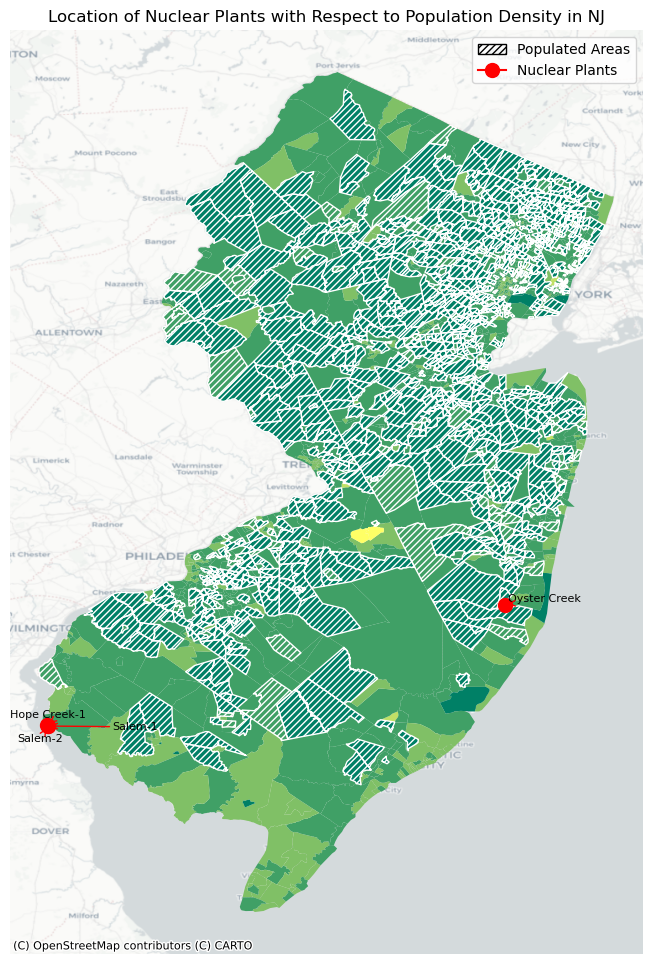

In [207]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.patches import Patch
from adjustText import adjust_text

# Increase the figure size
fig, ax = plt.subplots(figsize=(12, 12))

# Remove x-axis and y-axis labels and grids
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove the grid
ax.grid(False)

# Plot the main dataset with Longitude and Latitude
merged.plot(ax=ax, column="B19055_001CV", cmap='summer', legend=True, scheme='FisherJenks',
            missing_kwds={"color": "lightgrey", "edgecolor": "white", "label": "No estimate"})

# Plot the less_than_40 dataset with hatch pattern
less_than_40.plot(ax=ax, edgecolor='white', facecolor='none', column="B19055_001CV", hatch="/////")

# Convert df to a GeoDataFrame with Point geometries
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
df_geo = gpd.GeoDataFrame(df, geometry=geometry, crs=merged.crs)

# Overlay the two GeoDataFrames to get the intersection
intersection = gpd.overlay(df_geo, merged, how='intersection')

# Plot the intersection points with labels
scatter = ax.scatter(intersection['Longitude'], intersection['Latitude'], color='red', s=100, zorder=2)

# Create a list of labels
labels = [row['Name'] for idx, row in intersection.iterrows()]

# Use adjustText to avoid overlapping labels
adjust_text([plt.text(x, y, label, fontsize=8, color='black', ha='left', va='bottom') for x, y, label in zip(intersection['Longitude'], intersection['Latitude'], labels)],
            arrowprops=dict(arrowstyle='->', color='red'))

# Custom legend for less_than_40
legend_elements = [
    Patch(facecolor='none', edgecolor='black', hatch="/////"),
    Line2D([0], [0], marker='o', color='red', markerfacecolor='red', markersize=10),
]

legend_labels = ['Populated Areas', 'Nuclear Plants']

ax.legend(legend_elements, legend_labels, loc='upper right')

ctx.add_basemap(ax, crs=less_than_40.crs, source=ctx.providers.CartoDB.Positron)

# Add a title
plt.title("Location of Nuclear Plants with Respect to Population Density in NJ")

# Save the plot as an image
plt.savefig('map_with_nuclear_points.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

In [208]:
state_shapefile = gpd.read_file('States_shapefile.geojson')

state_shapefile = state_shapefile[~state_shapefile['State_Code'].isin(['AK', 'HI'])]
state_shapefile

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,8,,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,9,,DC,DISTRICT OF COLUMBIA,P,927,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,10,,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."
10,11,,GA,GEORGIA,N,929,"MULTIPOLYGON (((-85.13016 31.77885, -85.13156 ..."


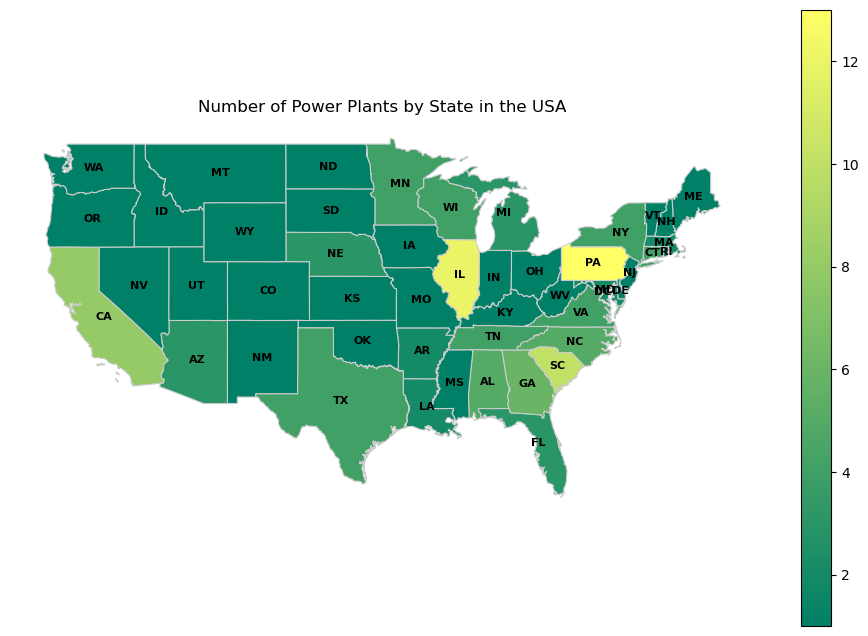

In [209]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Assume df and state_shapefile are defined

# Convert df to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs='EPSG:4326'  # Assuming your coordinates are in WGS84
)

# Convert the state shapefile to the same CRS as the power plant data
state_shapefile = state_shapefile.to_crs('EPSG:4326')

# Spatial join to count power plants in each state
powerplants_by_state = gpd.sjoin(state_shapefile, gdf, how='left', op='contains')
count_by_state = powerplants_by_state.groupby('State_Name').size()

# Give the Series a name
count_by_state.name = 'PowerPlant_Count'

# Prepare data for plotting
plot_data = state_shapefile.set_index('State_Name').join(count_by_state)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plot_data.plot(column='PowerPlant_Count', cmap='summer', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Display state_code on their respective states
for idx, row in plot_data.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, str(row['State_Code']),
            ha='center', va='center', fontdict={'fontsize': 8, 'fontweight': 'bold'})

ax.set_title('Number of Power Plants by State in the USA')

# Remove x-axis and y-axis labels and grids
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove the grid
ax.grid(False)

plt.show()
